# House Prices Regression

In [29]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns 


In [30]:
model_df = pd.read_csv("/Users/sa17/Desktop/house-prices-regression/data/processed/newtrain.csv")

model_df

,SalePrice,MSSubClass,LotArea,OverallQual,GrLivArea,GarageCars,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,208500,60,8450,7,1710,2,856,2,8,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,181500,20,9600,6,1262,2,1262,2,6,1976,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,223500,60,11250,7,1786,2,920,2,6,2001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,140000,70,9550,7,1717,3,961,1,7,1915,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,250000,60,14260,8,2198,3,1145,2,9,2000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,175000,60,7917,6,1647,2,953,2,7,1999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1395,210000,20,13175,6,2073,2,2073,2,7,1978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1396,266500,70,9042,7,2340,1,1188,2,9,1941,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1397,142125,20,9717,5,1078,1,1078,1,5,1950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Linear Regression Model

In [35]:
# Declare feature vector and target variable 
X = model_df.drop(["SalePrice"], axis=1)

y = model_df["SalePrice"]

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

# Prediction Model
linear_pred = linear.predict(X_test)

# Evaluation
linear_rmse = root_mean_squared_error(y_test, linear_pred)
linear_r2 = r2_score(y_test, linear_pred)

print(f"Linear Regression RMSE: {linear_rmse:.2f}")
print(f"Linear Regression R2 Score: {linear_r2:.2f}")



Linear Regression RMSE: 22093.61
Linear Regression R2 Score: 0.85


Root Mean Squared Error measures how far the model’s predictions are, on average, from the actual SalePrice. The Linear Regression model predictions are off by about 22,093 on average.

R2 measures how well the model explains the variance in the data.
0.85 = 85% of the variation in house prices. That’s a strong result for linear regression as R2 ranges from 0 t0 1 and the closer it is to 1 the better the model is.

## Checking Residuals (Errors)

Make sure the residuals are normally distributed and don’t show patterns

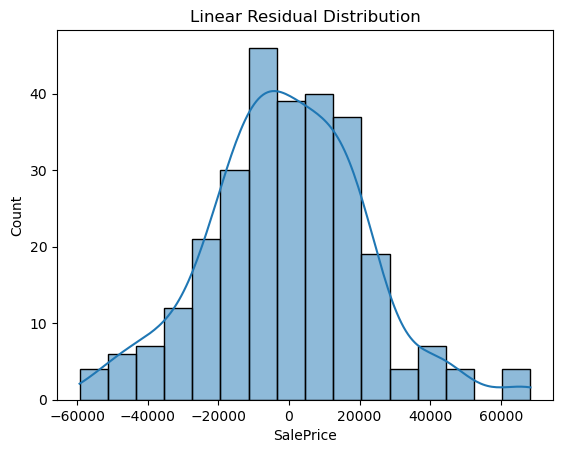

In [45]:
# Checking Residuals (errors)
residuals = y_test - linear_pred

sns.histplot(residuals, kde=True)
plt.title("Linear Residual Distribution")
plt.show()


The residuals are centered around 0, which is good. The distribution is roughly bell-shaped (normal). A small right skew and outliers, but not extreme.

The linear regression model doesn't show major bias; the residuals are well-behaved, which supports the model's predictions.

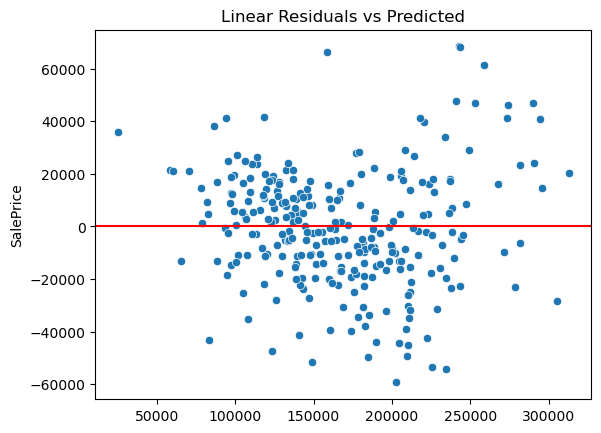

In [46]:
sns.scatterplot(x=linear_pred, y=residuals)
plt.axhline(0, color="red")
plt.title("Linear Residuals vs Predicted")
plt.show()

The spread of points is fairly random and evenly dispersed around the red line (residual = 0). No clear pattern, curve, or funnel shape.
Some outliers as its wider spread at higher predicted values, but not severe.

Linear regression is a reasonable model. The variance of errors increases slightly with higher sale prices, but nothing drastic.

## Random Forest Regressor Model

In [40]:
# Random Forest Regressor Model
random = RandomForestRegressor(random_state=42)
random.fit(X_train, y_train)
random.score(X_test, y_test)

# Prediction Model
random_pred = random.predict(X_test)

# Evaluation
random_rmse = root_mean_squared_error(y_test, random_pred)
random_r2 = r2_score(y_test, random_pred)

print(f"Random Forest Regressor RMSE: {random_rmse:.2f}")
print(f"Random Forest Regressor R2 Score: {random_r2:.2f}")

Random Forest Regressor RMSE: 22154.64
Random Forest Regressor R2 Score: 0.85


The Random Forest Regressor model predictions are off by about 22,154 on average.

0.85 = 85% of the variation in house prices. 

## Checking Residuals

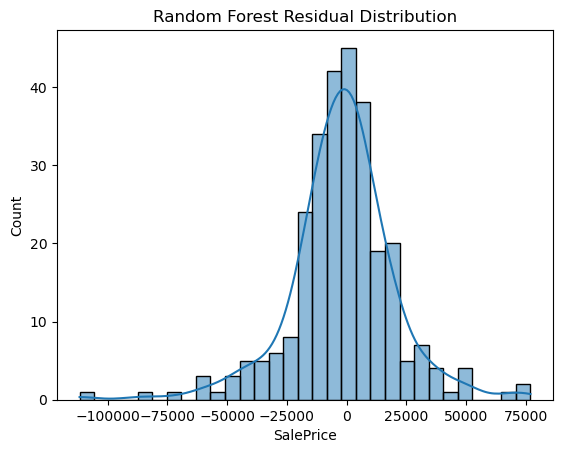

In [47]:
residual = y_test - random_pred

sns.histplot(residual, kde=True)
plt.title("Random Forest Residual Distribution")
plt.show()

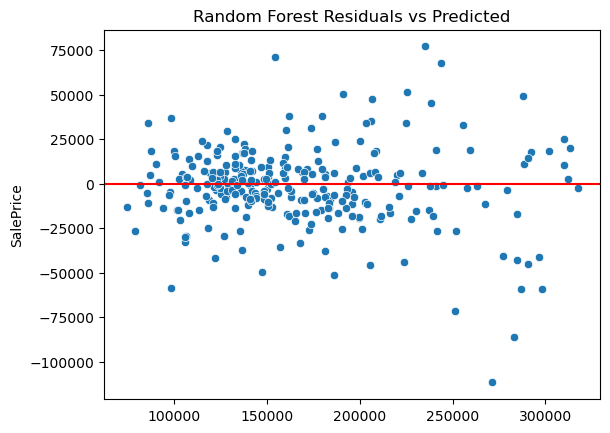

In [48]:
sns.scatterplot(x=random_pred, y=residual)
plt.axhline(0, color="red")
plt.title("Random Forest Residuals vs Predicted")
plt.show()